In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
GT = pd.read_csv('GT_Img4300.csv')
GT

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,center_x,center_y
0,ball,619,365,11,10,left004300.png,1280,720,624.5,370.0
1,ball,626,364,11,10,left004301.png,1280,720,631.5,369.0
2,ball,633,363,10,9,left004302.png,1280,720,638.0,367.5
3,ball,640,361,11,11,left004303.png,1280,720,645.5,366.5
4,ball,647,362,8,9,left004304.png,1280,720,651.0,366.5
...,...,...,...,...,...,...,...,...,...,...
96,ball,1008,516,14,11,left004396.png,1280,720,1015.0,521.5
97,ball,1015,512,11,13,left004397.png,1280,720,1020.5,518.5
98,ball,1020,508,12,13,left004398.png,1280,720,1026.0,514.5
99,ball,1026,505,12,12,left004399.png,1280,720,1032.0,511.0


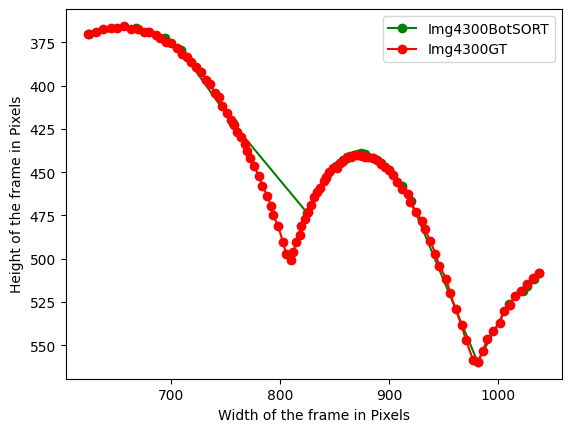

In [14]:
#img 4300 - BOTSORT
df = pd.read_csv('img4300_botsort.csv')
df['center_x'] = df['x'] + df['width']/2
df['center_y'] = df['y'] + df['height']/2

#plot the center of the bounding boxes
from matplotlib import markers
plt.plot(df['center_x'], df['center_y'], marker='o', color='green', label='Img4300BotSORT')
plt.plot(GT['center_x'], GT['center_y'], marker='o', color='red', label='Img4300GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [11]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

In [12]:
#AMD function definition
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)

In [15]:
x1 = GT['center_x']
y1 = GT['center_y']
x2 = df['center_x']
y2 = df['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates1 = list(zip(x2,y2))
    ground_coordinates1 = list(zip(x1,y1))
    count += 1
    
error1 = avg_displacement_error(predicted_coordinates1, ground_coordinates1)
error2 = avg_mahalanobis_distance(predicted_coordinates1, ground_coordinates1)
print('ADE for BOTSORT (img4300) is:', error1, 'and AMD for BOTSORT (img4300) is:', error2)

ADE for BOTSORT (img4300) is: 178.5408905594849 and AMD for BOTSORT (img4300) is: 2.4219679404528605


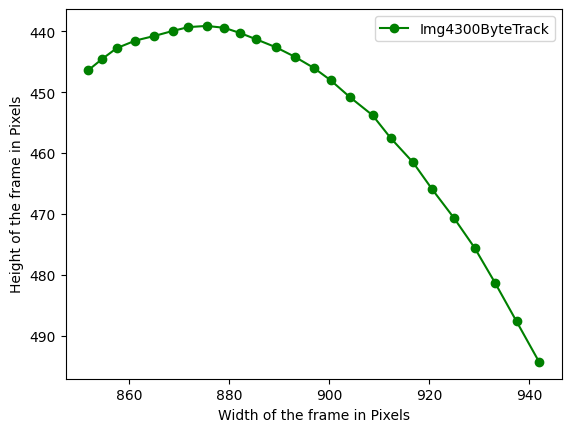

In [16]:
#img 4300 - ByteTrack
df2 = pd.read_csv('img4300_bytetrack.csv')
df2['center_x'] = df2['x'] + df2['width']/2
df2['center_y'] = df2['y'] + df2['height']/2

#plot the center of the bounding boxes
from matplotlib import markers
plt.plot(df2['center_x'], df2['center_y'], marker='o', color='green', label='Img4300ByteTrack')
# plt.plot(GT['center_x'], GT['center_y'], marker='o', color='red', label='Img4300GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [17]:
x3 = df2['center_x']
y3 = df2['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates2 = list(zip(x3,y3))
    ground_coordinates2 = list(zip(x1,y1))
    count += 1
    
error3 = avg_displacement_error(predicted_coordinates2, ground_coordinates2)
erro4 = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates2)
print('ADE for ByteTrack (img4300) is:', error3, 'and AMD for ByteTrack (img4300) is:', erro4)

ADE for ByteTrack (img4300) is: 215.03460458551865 and AMD for ByteTrack (img4300) is: 8.590955946706957


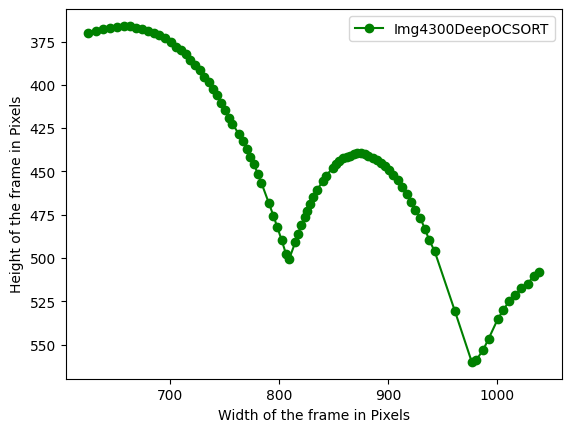

In [18]:
#img 4300 - DeepOCSORT
df3 = pd.read_csv('img4300_deepocsort.csv')
df3['center_x'] = df3['x'] + df3['width']/2
df3['center_y'] = df3['y'] + df3['height']/2

#plot the center of the bounding boxes
from matplotlib import markers
plt.plot(df3['center_x'], df3['center_y'], marker='o', color='green', label='Img4300DeepOCSORT')
# plt.plot(GT['center_x'], GT['center_y'], marker='o', color='red', label='Img4300GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()


In [19]:
x4 = df3['center_x']
y4 = df3['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates3 = list(zip(x4,y4))
    ground_coordinates3 = list(zip(x1,y1))
    count += 1
    
error5 = avg_displacement_error(predicted_coordinates3, ground_coordinates3)
error6 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates3)
print('ADE for DeepOCSORT (img4300) is:', error5, 'and AMD for DeepOCSORT (img4300) is:', error6)

ADE for DeepOCSORT (img4300) is: 19.900935256615018 and AMD for DeepOCSORT (img4300) is: 0.730480168549713


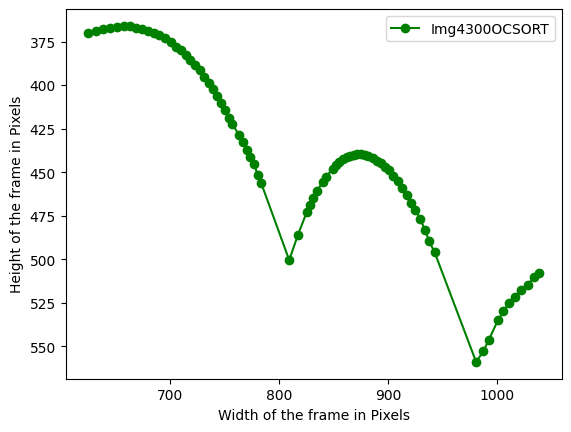

In [20]:
#img 4300 - OCSORT
df4 = pd.read_csv('img4300_ocsort.csv')
df4['center_x'] = df4['x'] + df4['width']/2
df4['center_y'] = df4['y'] + df4['height']/2

#plot the center of the bounding boxes
from matplotlib import markers
plt.plot(df4['center_x'], df4['center_y'], marker='o', color='green', label='Img4300OCSORT')
# plt.plot(GT['center_x'], GT['center_y'], marker='o', color='red', label='Img4300GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [21]:
x5 = df4['center_x']
y5 = df4['center_y']
count=0
for i in range(len(x1)):
    predicted_coordinates4 = list(zip(x5,y5))
    ground_coordinates4 = list(zip(x1,y1))
    count += 1
    
error7 = avg_displacement_error(predicted_coordinates4, ground_coordinates4)
error8 = avg_mahalanobis_distance(predicted_coordinates4, ground_coordinates4)
print('ADE for OCSORT (img4300) is:', error7, 'and AMD for OCSORT (img4300) is:', error8)

ADE for OCSORT (img4300) is: 39.161675205998435 and AMD for OCSORT (img4300) is: 1.2813661122557087


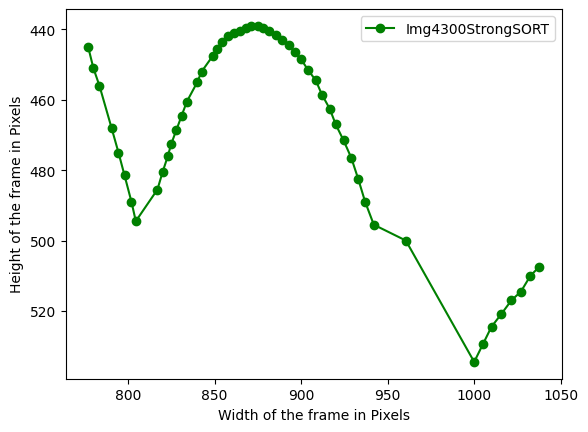

In [22]:
#img 4300 - StrongSORT
df5 = pd.read_csv('img4300_strongsort.csv')
df5['center_x'] = df5['x'] + df5['width']/2
df5['center_y'] = df5['y'] + df5['height']/2

#plot the center of the bounding boxes
from matplotlib import markers
plt.plot(df5['center_x'], df5['center_y'], marker='o', color='green', label='Img4300StrongSORT')
# plt.plot(GT['center_x'], GT['center_y'], marker='o', color='red', label='Img4300GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [23]:
x6 = df5['center_x']
y6 = df5['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates5 = list(zip(x6,y6))
    ground_coordinates5 = list(zip(x1,y1))
    count += 1
    
error9 = avg_displacement_error(predicted_coordinates5, ground_coordinates5)
error10 = avg_mahalanobis_distance(predicted_coordinates5, ground_coordinates5)
print('ADE for StrongSORT (img4300) is:', error9, 'and AMD for StrongSORT (img4300) is:', error10)

ADE for StrongSORT (img4300) is: 153.77323376469184 and AMD for StrongSORT (img4300) is: 3.433657168117895
